In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris['data'].shape,iris['target'].shape

((150, 4), (150,))

In [7]:
df=pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['Target']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
Target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [14]:
df['Target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: Target, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B3ACD3088>,
      dtype=object)

<Figure size 1080x1440 with 0 Axes>

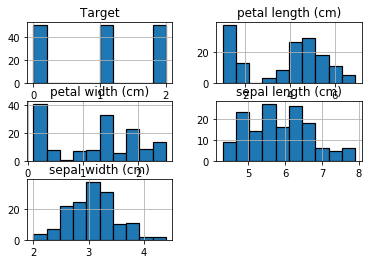

In [11]:
plt.figure(figsize=(15,20))
df.hist(edgecolor='black', linewidth=1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B3AF87288>,
      dtype=object)

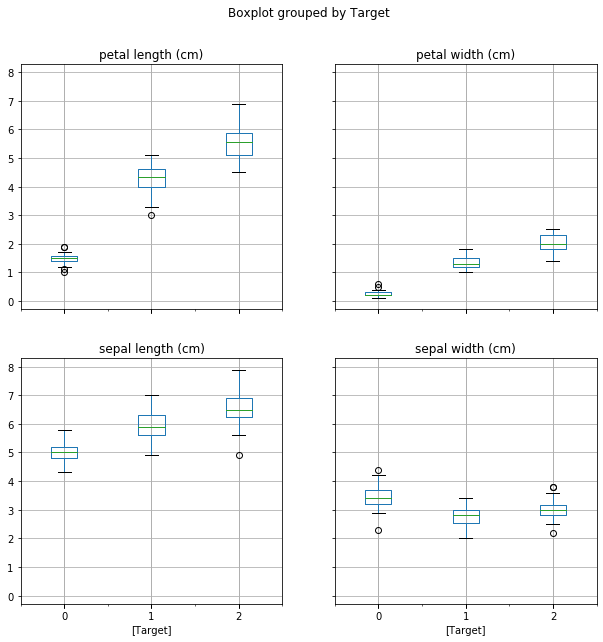

In [12]:
df.boxplot(by='Target',figsize=(10,10))

In [17]:
## It seems petal length and petal width can distinguish well between class 0 and the other classes
## it seems no feature can distingusih well enought between class 1 and class 2

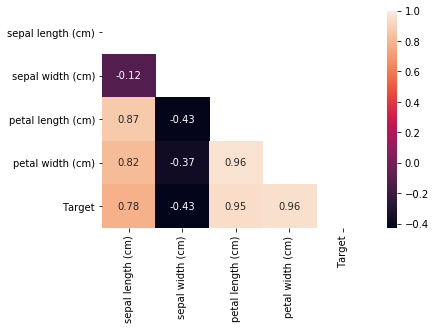

In [13]:
mask = np.triu(np.ones_like(df.corr()))
sn.heatmap(df.corr(),mask=mask,annot=True)
## as expected a high correlation between petal length  to Target and petal width to target. There is also high correlation 
## between petal length nad petal width

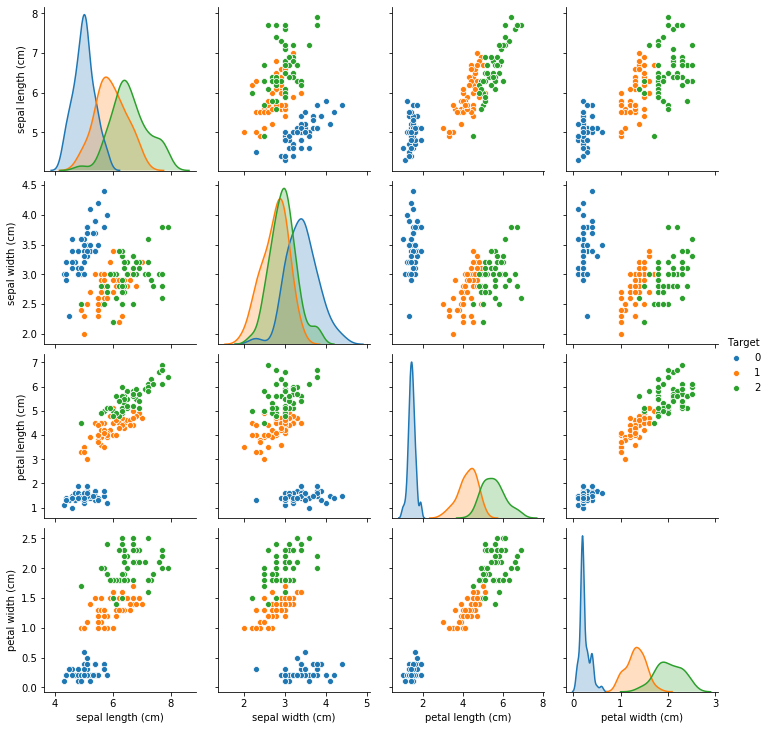

In [14]:
sn.pairplot(data=df,hue='Target' )
## it is easiers to decipher class 0 by these features. It seems that the width features can decipher better class 1 from class 2

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X=df.drop(columns='Target')
y=df['Target']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report


In [35]:

models=['RandomForestClassifier','KNeighborsClassifier','GaussianNB']
results=[{} for i in range(len(models))]
for  i,model in enumerate(models):
    clf=eval(model)()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    results[i]={'Model_name':model,'Model':clf,'predictions':y_pred,'true':y_test,'accuracy':clf.score(X_test,y_test),
              'proba':clf.predict_proba(X_test) ,'cm':confusion_matrix(y_test,y_pred),'report': classification_report(y_test,y_pred)}


In [36]:
for i in range(len(results)):
    print('MODEL:{}'.format(results[i]['Model']))
    print('Accuracy:{}'.format(results[i]['accuracy']))
    print('')
    print('{}'.format(results[i]['cm']))
    print('')
    print(':{}'.format(results[i]['report']))
    print(results[i]['predictions'])

MODEL:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy:0.9210526315789473

[[12  0  0]
 [ 0 11  2]
 [ 0  1 12]]

:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

In [31]:
## In terms of accuaracy and f score knn model outperformed the other models.

In [44]:
## for random forest

feature_importance=pd.DataFrame(results[0]['Model'].feature_importances_,X.columns)
feature_importance.sort_values(by=[0],ascending=False)
## as expected the most important features are petal length and petal width

,0
petal length (cm),0.487226
petal width (cm),0.382945
sepal length (cm),0.113078
sepal width (cm),0.016752


In [46]:
array=X_test
for result in results:
    array=np.hstack((array,result['predictions'].reshape(-1,1)))

In [50]:
df_predictions=pd.DataFrame(array,columns=list(X.columns)+[result['Model_name'] for result in results])
df_predictions

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),RandomForestClassifier,KNeighborsClassifier,GaussianNB
0,5.1,2.5,3.0,1.1,1.0,1.0,1.0
1,6.1,2.8,4.0,1.3,1.0,1.0,1.0
2,5.5,2.5,4.0,1.3,1.0,1.0,1.0
3,6.7,3.0,5.2,2.3,2.0,2.0,2.0
4,4.9,3.1,1.5,0.2,0.0,0.0,0.0
5,4.4,3.0,1.3,0.2,0.0,0.0,0.0
6,6.4,3.2,5.3,2.3,2.0,2.0,2.0
7,5.0,3.4,1.5,0.2,0.0,0.0,0.0
8,6.8,2.8,4.8,1.4,1.0,1.0,1.0
9,4.9,2.5,4.5,1.7,1.0,1.0,1.0


In [51]:
def plot_graph(df_predictions,col):
    plt.title('Model:{}'.format(col))
    sn.scatterplot(x='petal width (cm)',y='petal length (cm)',data=df_predictions,hue=col,palette="deep")
    plt.show()

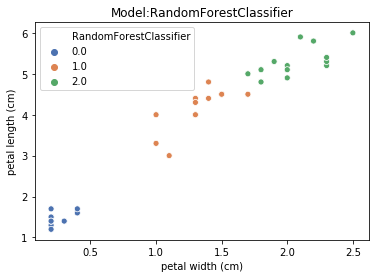

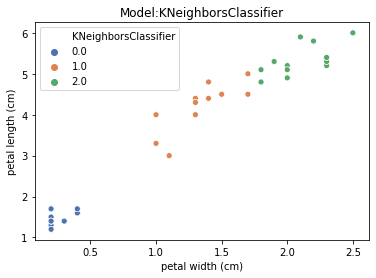

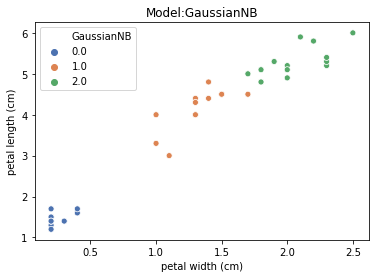

In [52]:
for model in models:
    plot_graph(df_predictions,model)

In [53]:
class_0=np.array([np.mean(result['proba'][:,0]) for result in results]+[0])
class_1=np.array([np.mean(result['proba'][:,1]) for result in results]+[0])
class_2=np.array([np.mean(result['proba'][:,2]) for result in results]+[0])

In [54]:
array=np.vstack((class_0,class_1))
##class_2,class_1,class_0
array=np.vstack((array,class_2))
array

array([[0.31605263, 0.31578947, 0.31578947, 0.        ],
       [0.30026316, 0.34736842, 0.32406701, 0.        ],
       [0.38368421, 0.33684211, 0.36014351, 0.        ]])

In [55]:
voting=np.mean(array,axis=0)
voting

array([0.33333333, 0.33333333, 0.33333333, 0.        ])

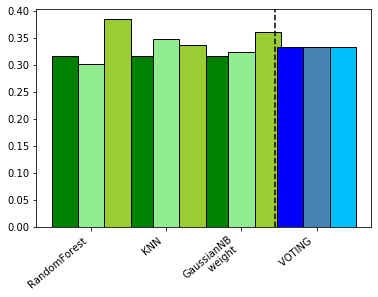

In [56]:
fig, ax = plt.subplots()
ind=np.arange(len(results)+1)
width = 0.35
p1 = ax.bar(ind, class_0,width, color="green", edgecolor="k")
p2 = ax.bar(ind + width, class_1,width, color="lightgreen", edgecolor="k")
p3=ax.bar(ind +2* width, class_2,width, color="yellowgreen", edgecolor="k")
p4=ax.bar(ind,[0,0,0,voting[0]],width, color="blue", edgecolor="k")
p5=ax.bar(ind+width,[0,0,0,voting[1]],width, color="steelblue", edgecolor="k")
p6=ax.bar(ind+2*width,[0,0,0,voting[2]],width, color="deepskyblue", edgecolor="k")
plt.axvline(2.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "RandomForest ",
        "KNN ",
        "GaussianNB\nweight ",
         "VOTING "
       
    ],
    rotation=40,
    ha="right",
)
plt.show()
##p4 = ax.bar(